In [1]:
# kaggle dataset link: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

# Data Exploring

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('dataset.csv',index_col=0)
df.shape

(114000, 20)

In [4]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [7]:
print(f'there are {df.isnull().sum().sum()} missing values in the dataset')
print(f'there are {df.duplicated().sum()} duplicated values in the dataset')
print('getting rid of missing values and duplicated values')
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(f'there are {df.isnull().sum().sum()} missing values in the dataset')
print(f'there are {df.duplicated().sum()} duplicated values in the dataset')

there are 3 missing values in the dataset
there are 450 duplicated values in the dataset
getting rid of missing values and duplicated values
there are 0 missing values in the dataset
there are 0 duplicated values in the dataset


In [8]:
print(f'track_id is unique: {df.track_id.is_unique}')
print(f'there are {df.shape[0]} rows in the dataset, and {df.track_id.nunique()} unique track_id')

track_id is unique: False
there are 113549 rows in the dataset, and 89740 unique track_id


In [9]:
duplicate_track_ids = df[df.duplicated(subset='track_id', keep=False)]['track_id']
df[df.track_id.isin(duplicate_track_ids)].sort_values(by='track_id').head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15008,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,chill
102769,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,soul
85237,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.01940,0.088100,0.3290,0.700,183.571,1,punk-rock
99978,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.01940,0.088100,0.3290,0.700,183.571,1,ska
2105,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alt-rock


In [10]:
# it seems like there duplicate track_ids, because they belong to different track_genre
# we want to make sure that this is the case, so we will check if there are any duplicate track_ids with the same track_genre
duplicate_track_genre = df.groupby(['track_id', 'track_genre']).size()
duplicate_track_genre = duplicate_track_genre[duplicate_track_genre > 1]
print(f'there are {duplicate_track_genre.shape[0]} track_ids with duplicate track_genre')
print('so we can conclude that the duplicate track_ids belong to different track_genre')

there are 0 track_ids with duplicate track_genre
so we can conclude that the duplicate track_ids belong to different track_genre


In [11]:
from utils import get_ticks, plot_on_bars, config_plot, plot_on_bars_hist

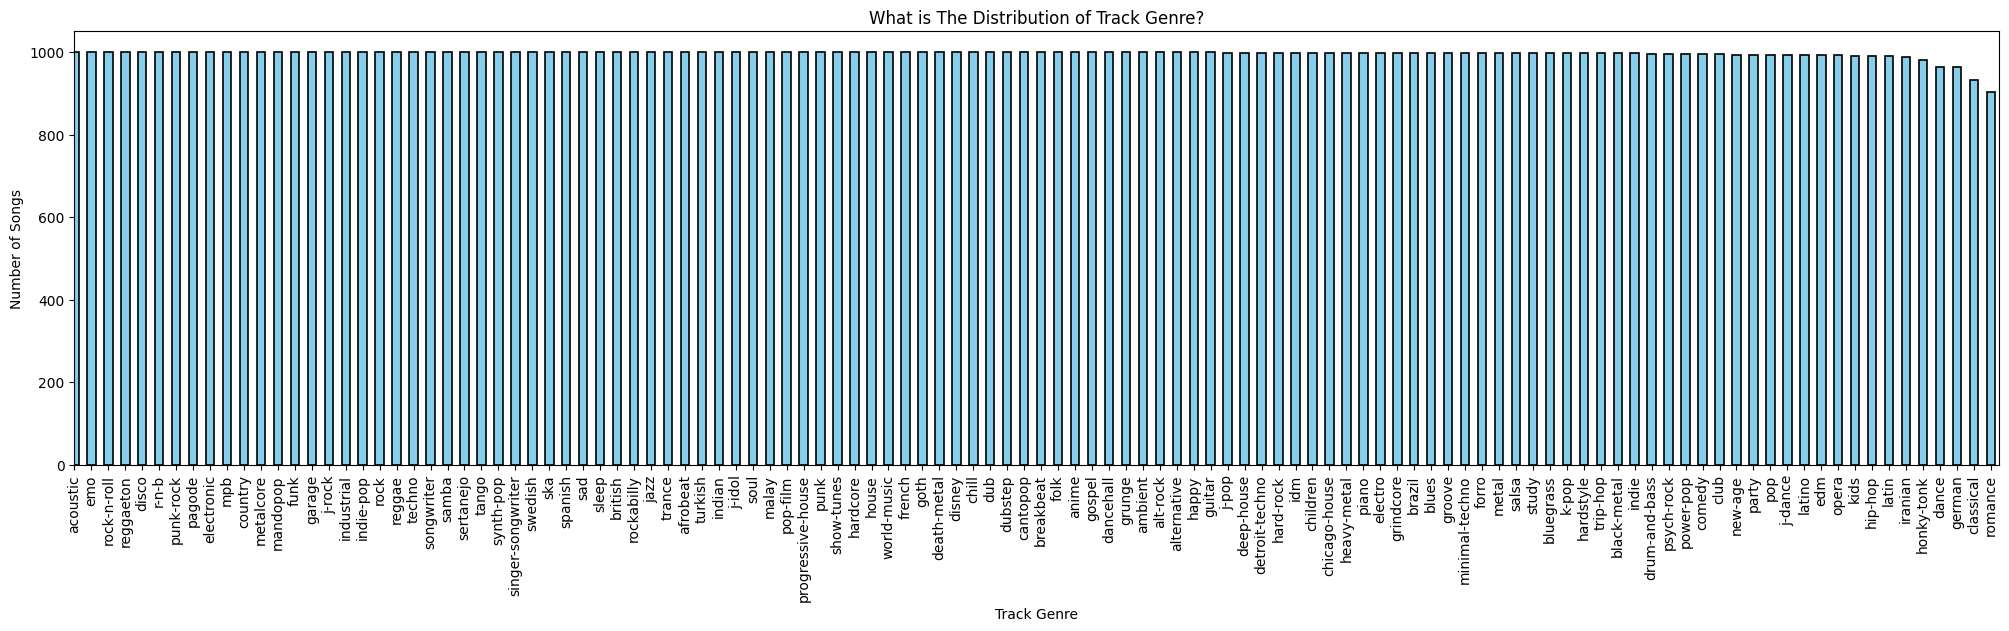

In [12]:
question = "What is The Distribution of Track Genre?"

genre_counts = df['track_genre'].value_counts()

# Plot the distribution of track_genre
plt.figure(figsize=(20, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2)
config_plot(plt, question, 'Track Genre', 'Number of Songs', show_grid=False)
plt.xticks(rotation=90)
plt.xlim(left=0)
plt.show()

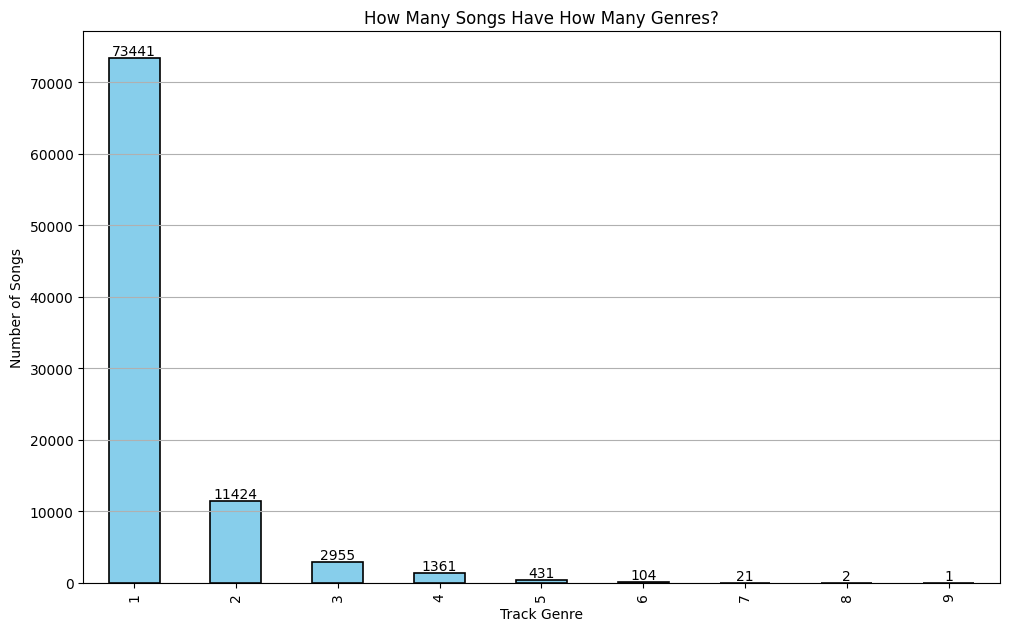

In [13]:
# Grouping the DataFrame by 'track_id' and counting the number of unique 'track_genre' values for each song
songs_genre_count = df.groupby('track_id')['track_genre'].nunique()

# Counting the occurrences of each unique count of genres
genre_count_distribution = songs_genre_count.value_counts().sort_index()

# to answer the question:
question = "How Many Songs Have How Many Genres?"
plt.figure(figsize=(10, 6))
genre_count_distribution.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2)
plot_on_bars(plt, genre_count_distribution)
config_plot(plt, question, 'Track Genre', 'Number of Songs', show_grid=False)
plt.grid(axis='y')
plt.show()


In [14]:
# Step 1: Split the 'track_genre' column into separate genre columns
genres = df['track_genre'].str.get_dummies(',')

# Step 2: Combine the binary genre variables into a new DataFrame
genre_combinations = pd.concat([df['track_id'], genres], axis=1)

# Set 'track_id' as the index
genre_combinations.set_index('track_id', inplace=True)

genre_combinations = genre_combinations.groupby('track_id').sum()

genre_combinations.head()

,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
track_id,,,,,,,,,,,,,,,,,,,,,
0000vdREvCVMxbQTkS888c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000CC8EParg64OmTxVnZ0p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000Iz0K615UepwSJ5z2RE5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000RDCYioLteXcutOjeweY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000qpdoc97IMTBvF8gwcpy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
genre_combinations.shape

(89740, 114)

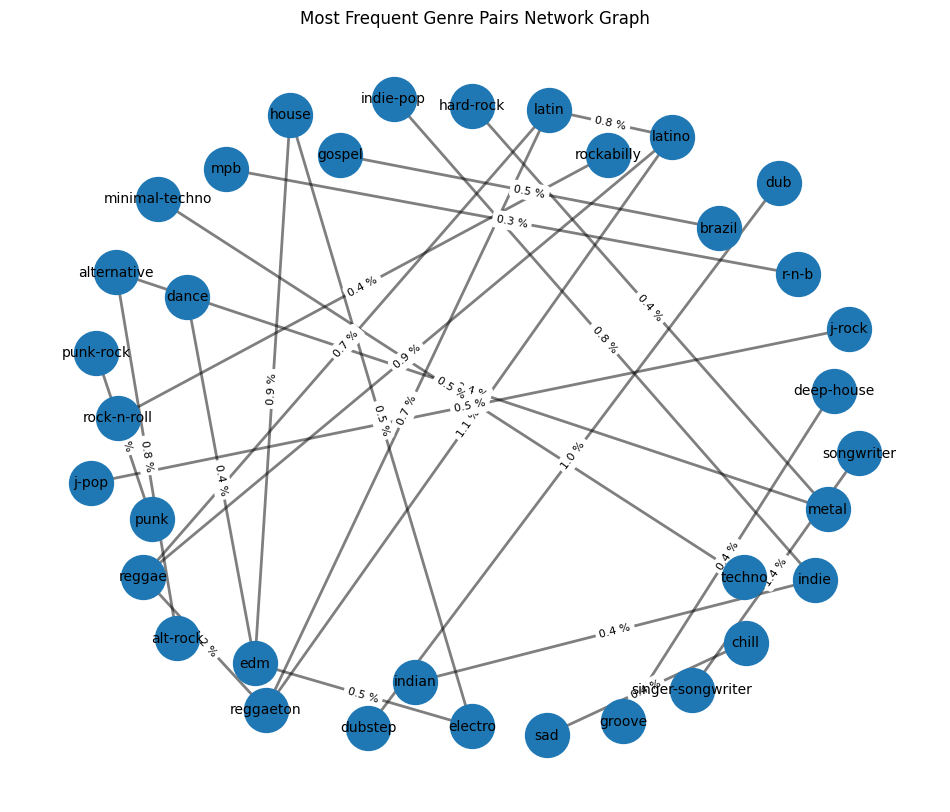

In [16]:
# Calculate the frequency of co-occurrence for each pair of genres
genre_cooccurrence = genre_combinations.T.dot(genre_combinations)

# Remove diagonal elements (self-co-occurrence)
np.fill_diagonal(genre_cooccurrence.values, 0)

# Normalize the count of co-occurrences
max_count = genre_cooccurrence.values.sum()
normalized_cooccurrence = genre_cooccurrence / max_count

# Get the most frequent genre pairs (top N pairs)
top_n = 50
most_frequent_pairs = normalized_cooccurrence.stack().nlargest(top_n)

# Create a network graph
G = nx.Graph()

# Add edges (genre pairs) to the graph
for pair, count in most_frequent_pairs.items():
    genre1, genre2 = pair
    if count > 0:
        G.add_edge(genre1, genre2, weight=count)

# Draw the network graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=550)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
# Add edge labels (number of co-occurrences)
edge_labels = {(genre1, genre2): f'{round(count*100,1)} %' for (genre1, genre2), count in nx.get_edge_attributes(G, 'weight').items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Most Frequent Genre Pairs Network Graph')
plt.axis('off')
plt.show()

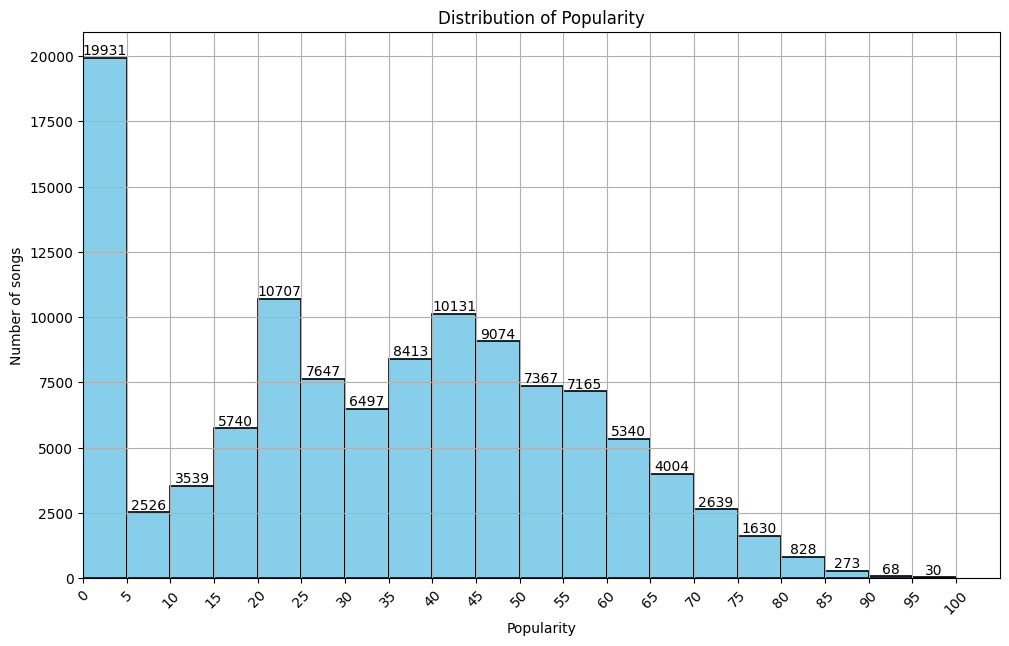

In [17]:
plt.figure(figsize=(10, 6))
ticks=get_ticks(20, df['popularity'])
# Plotting the histogram of popularity
bars = plt.hist(df['popularity'], bins=ticks, color='skyblue', edgecolor='black', linewidth=1.2)
plot_on_bars_hist(plt, bars)
config_plot(plt, 'Distribution of Popularity', 'Popularity', 'Number of songs')
plt.xticks(ticks=ticks, rotation=45)
plt.xlim(left=0)
plt.show()

In [18]:
# Grouping the DataFrame by the 'artists' column and counting the number of occurrences
artist_song_count = df.groupby('artists')['track_id'].count()

# Sorting the result in descending order
artist_song_count_sorted = artist_song_count.sort_values(ascending=False)

# Displaying the top artists with the most songs
print(artist_song_count_sorted.head())  

artists
The Beatles        279
George Jones       260
Stevie Wonder      235
Linkin Park        224
Ella Fitzgerald    221
Name: track_id, dtype: int64


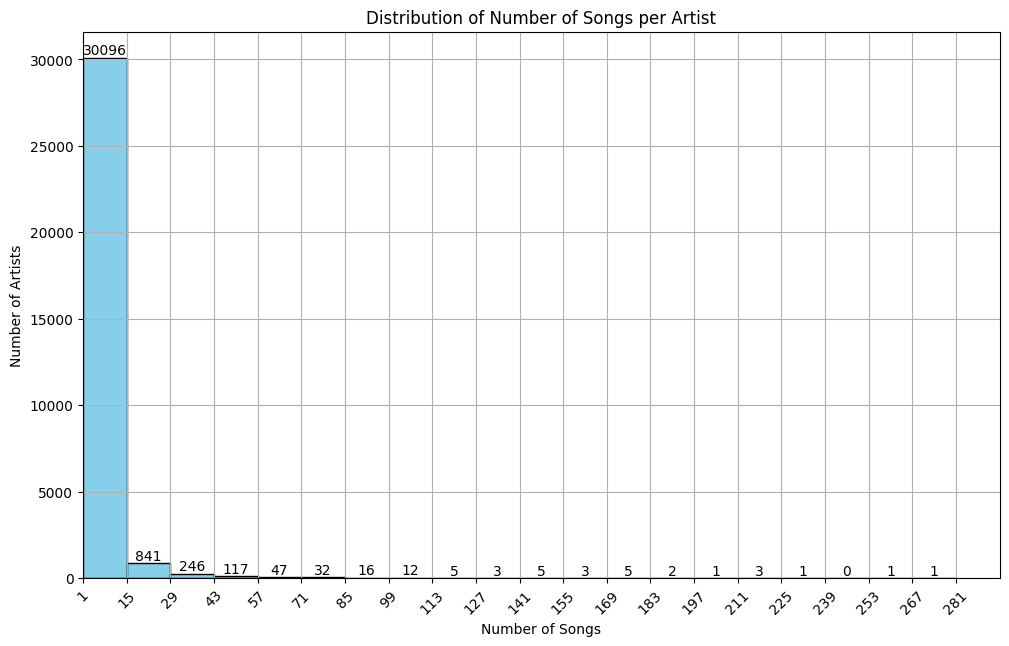

In [19]:
plt.figure(figsize=(10, 6))
ticks=get_ticks(20, artist_song_count_sorted)
bars = plt.hist(artist_song_count_sorted, bins=ticks, color='skyblue', edgecolor='black') 
plot_on_bars_hist(plt, bars)
config_plot(plt, 'Distribution of Number of Songs per Artist', 'Number of Songs', 'Number of Artists')
plt.xticks(ticks=ticks, rotation=45)
plt.xlim(left=1)
plt.show()

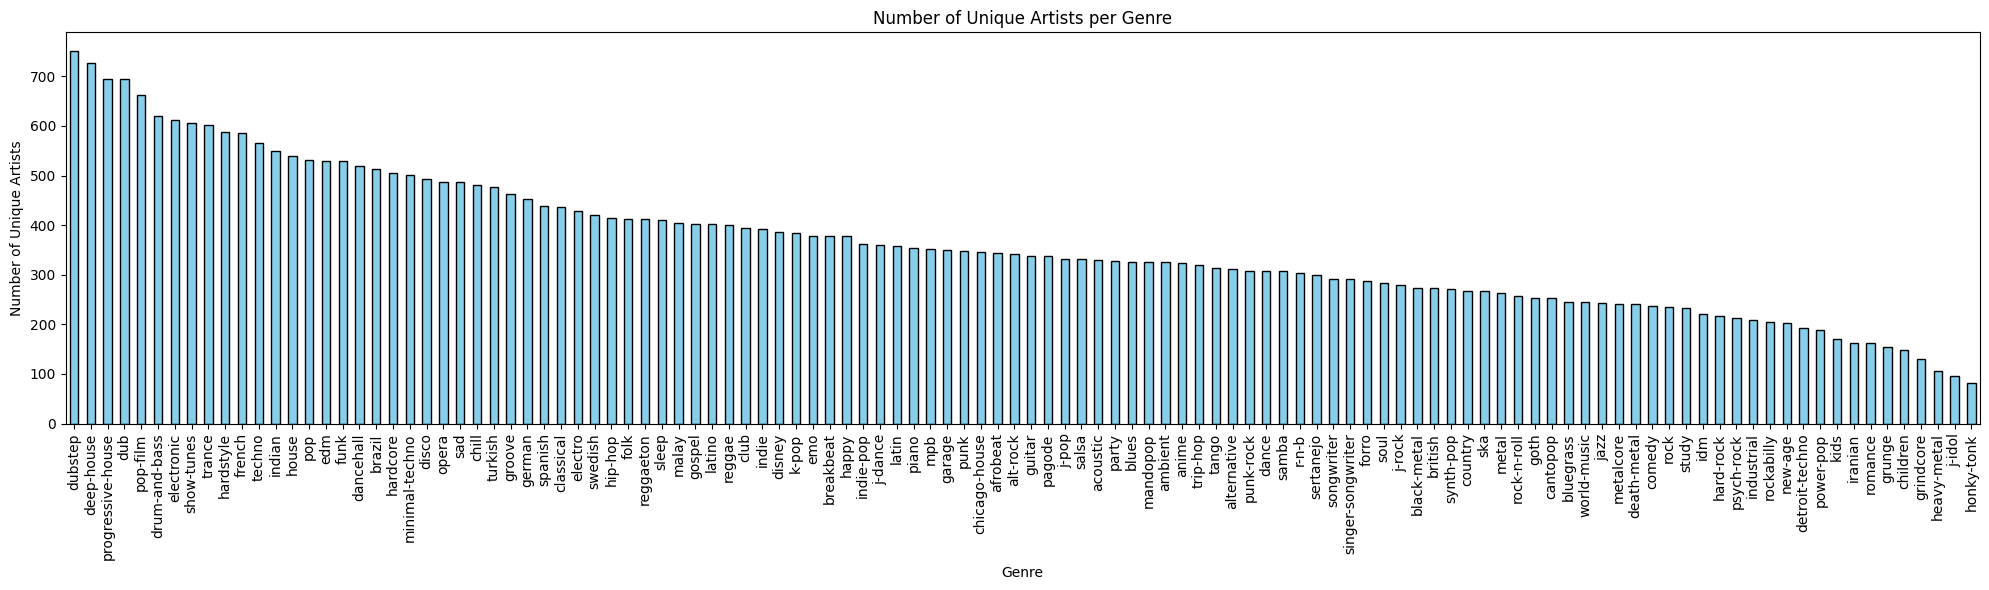

In [20]:
# Grouping the DataFrame by the 'track_genre' column and counting the number of unique artists
genre_artist_count = df.groupby('track_genre')['artists'].nunique().sort_values(ascending=False)

plt.figure(figsize=(20, 6))

# Plotting the bar plot
genre_artist_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Genre')
plt.ylabel('Number of Unique Artists')
plt.title('Number of Unique Artists per Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Preprocessing

## Handle Missing Values
Check for and impute or remove missing values ✅

In [21]:
print(f'there are {df.isnull().sum().sum()} missing values in the dataset')

there are 0 missing values in the dataset


## Encode Categorical Variables

In [22]:
# show categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

we will exclude the 'track_id' because it is a unique identifier for each track and will not be useful for our model.

In [23]:
categorical_columns.pop(0)
categorical_columns

['artists', 'album_name', 'track_name', 'track_genre']

The data contains categorical variables, we need to encode them to numerical values, our typical options are:
- One-hot encoding
- Label encoding

since none of the categorical columns have ordinal relationships, we can not use label encoding.

before using one-hot encoding,
we will check how much unique values in each column and then we will encode them to numerical values.

In [24]:
for col in categorical_columns:
    print(f'{col}: {df[col].nunique()}')

artists: 31437
album_name: 46589
track_name: 73608
track_genre: 114


as we can see none of the categorical variables have a high cardinality (a lot of unique values) so we can use one-hot encoding.

so we will check other encoding method:

**Frequency Encoding**:
   - **Method**: Replace each category with the frequency of its occurrence in the dataset. Essentially, you map each category to its count in the dataset.
   - **Example**: If a category "A" appears 100 times in the dataset, all instances of "A" would be replaced with the value 100.
   - **Advantages**: Helps capture the importance of each category based on its frequency in the dataset. It can be particularly useful if certain categories are more prevalent or significant.
   - **Considerations**: Ensure that the encoding does not introduce data leakage if frequency counts are computed before splitting the data into training and testing sets.

In [25]:
# we will implement frequency encoding for the categorical columns

for col in categorical_columns:
    freq_encoding = df[col].value_counts(normalize=True)
    df[col] = df[col].map(freq_encoding)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,0.000088,0.000035,0.000035,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0.008807
1,4qPNDBW1i3p13qLCt0Ki3A,0.000114,0.000018,0.000026,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0.008807
2,1iJBSr7s7jYXzM8EGcbK5b,0.000009,0.000009,0.000009,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0.008807
3,6lfxq3CG4xtTiEg7opyCyx,0.000132,0.000009,0.000053,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0.008807
4,5vjLSffimiIP26QG5WcN2K,0.000097,0.000053,0.000176,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0.008807


In [26]:
for col in categorical_columns:
    print(f'{col}: {df[col].nunique()}')

artists: 124
album_name: 99
track_name: 60
track_genre: 17


In [27]:
df['explicit'] = df['explicit'].astype(int)

## Correlation Analysis

We'll start by creating a correlation matrix heatmap to visualize the relationships between features and the target variable (popularity). This will help us identify features that are closely related to popularity and also check for multicollinearity among predictors.

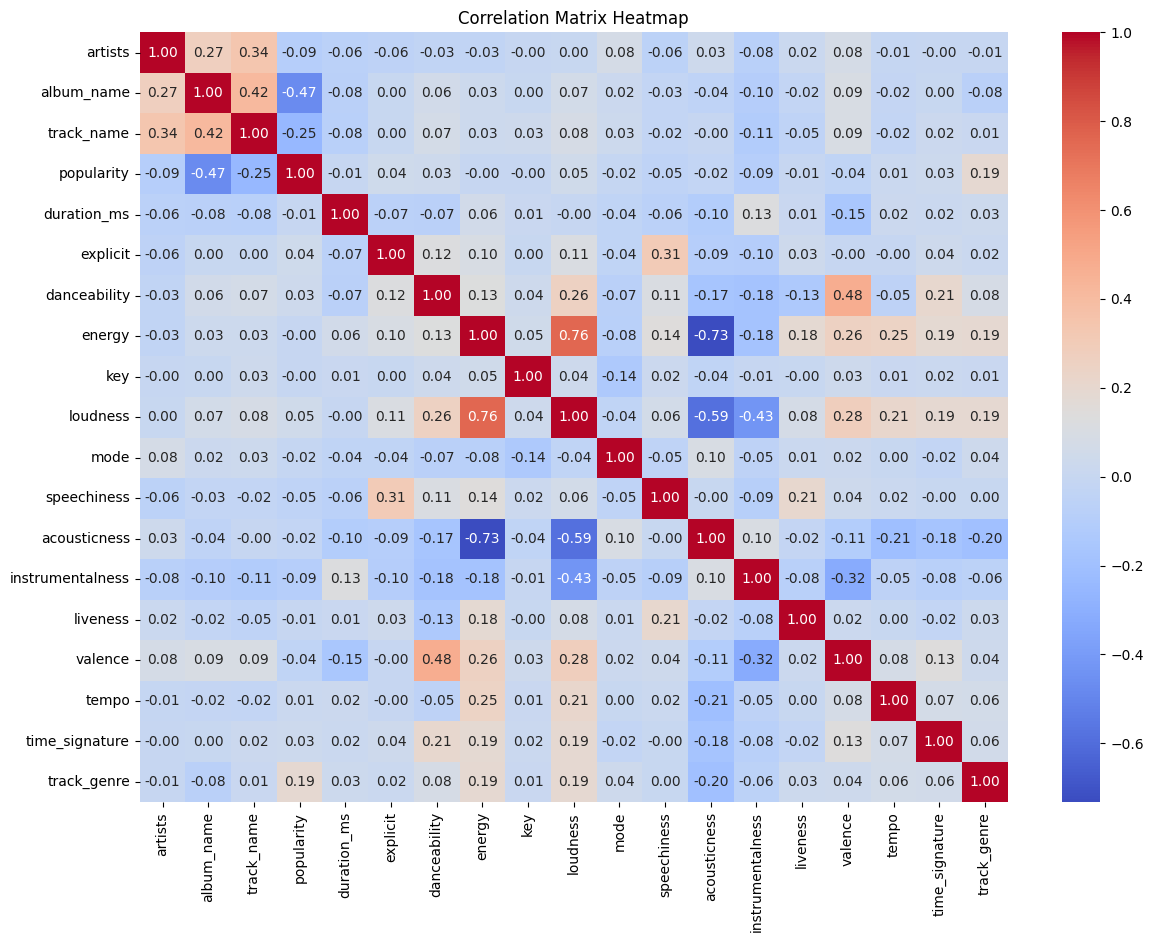

In [28]:
# Correlation Matrix Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Linearity: 
The relationship between the predictor variables and the target variable should be linear. This means that the change in the target variable is proportional to changes in the predictor variables.

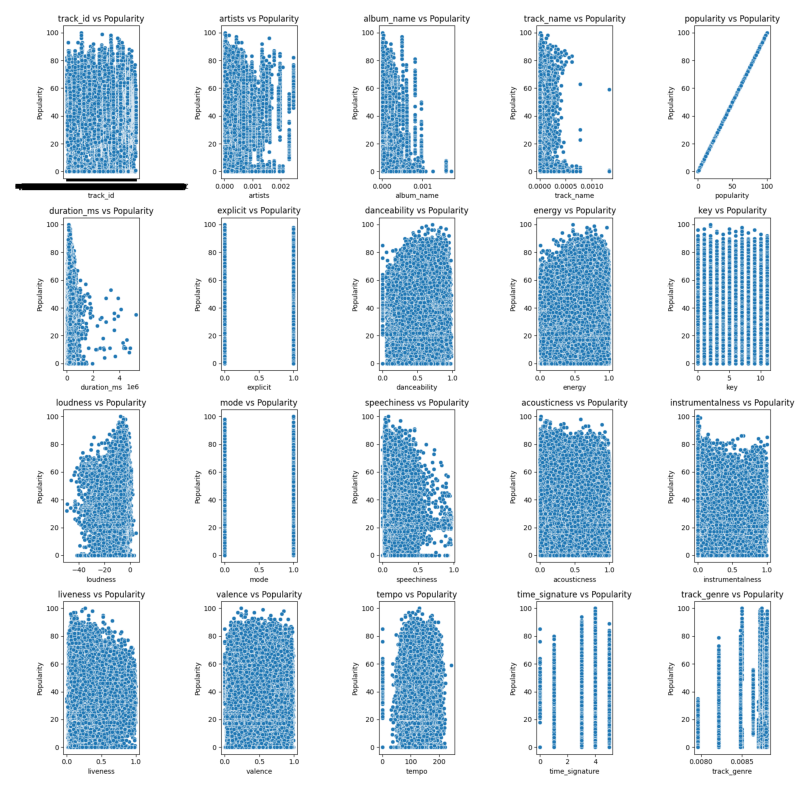

In [29]:
import os
# check if linearty.png exists
if os.path.exists('linearity.png'):
    # plot the linearity.png
    plt.figure(figsize=(14, 10))
    plt.imshow(plt.imread('linearity.png'))
    plt.axis('off')
    plt.show()
else:

    columns_to_plot = [col for col in df.columns if col != 'popularity' or col != 'track_id']


    # Set the number of columns to display per row
    columns_per_row = 5

    # Calculate the number of rows required
    num_rows = -(-len(columns_to_plot) // columns_per_row)  # Ceiling division

    # Create subplots
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(16, 4*num_rows))

    # Flatten axes for easier indexing
    axes = axes.flatten()

    # Plot each column against popularity
    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        sns.scatterplot(x=df[column], y=df['popularity'], ax=ax)
        ax.set_title(f'{column} vs Popularity')
        ax.set_xlabel(column)
        ax.set_ylabel('Popularity')

    # Hide any empty subplots
    for i in range(len(columns_to_plot), len(axes)):
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()


due to the non-linear relationships observed in the data, linear models are not suitable for predicting popularity. Alternative modeling approaches should be explored, accompanied by appropriate feature engineering and evaluation techniques to develop robust predictive models.

## Outliers

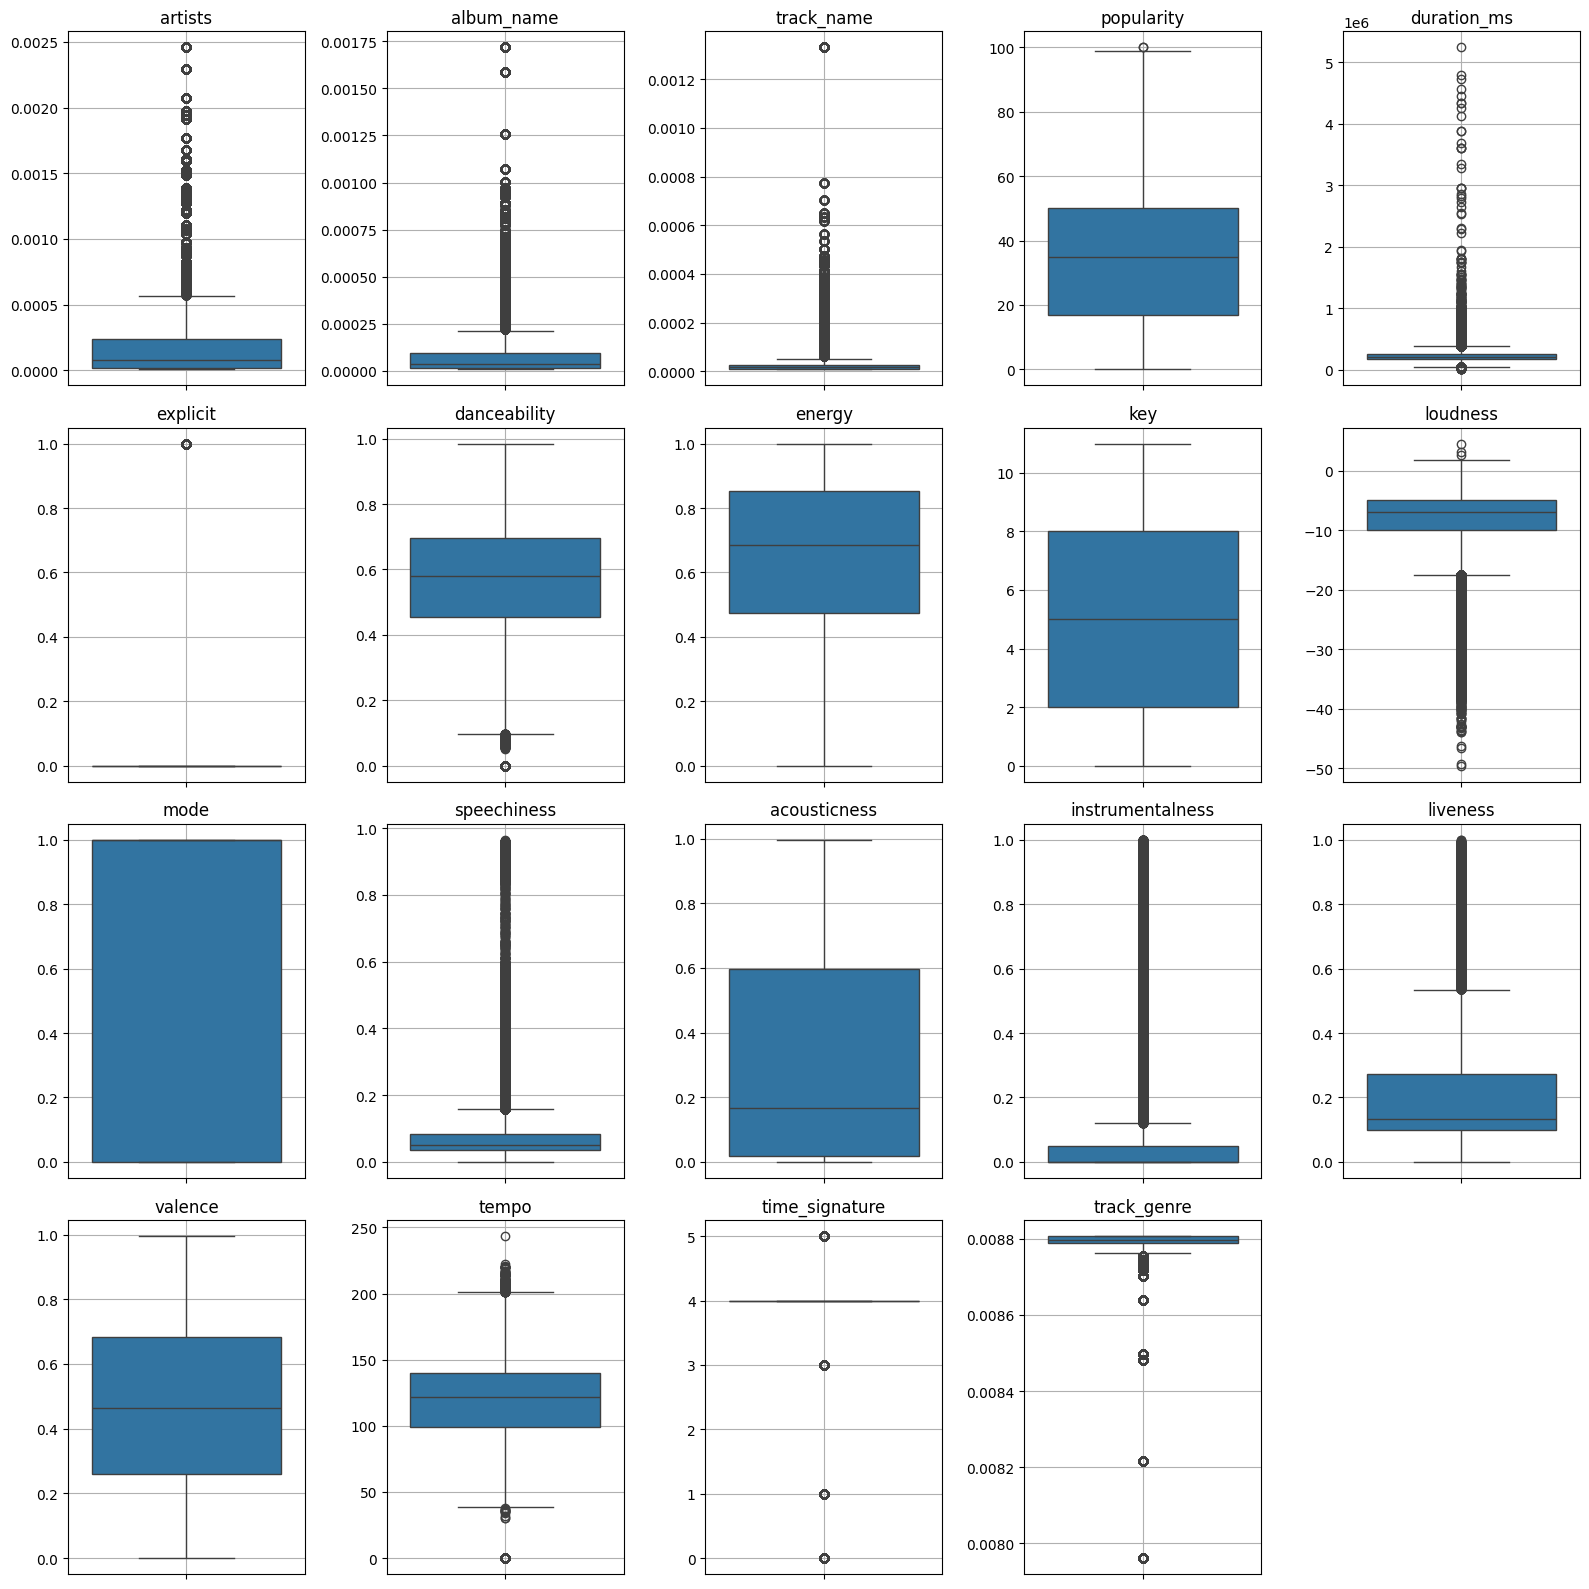

In [30]:

numerical_columns = df.select_dtypes(include=['float64', 'int64'])
num_columns = numerical_columns.shape[1]

# Set the number of boxes per row
boxes_per_row = 5

# Calculate the number of rows required
num_rows = (num_columns + boxes_per_row - 1) // boxes_per_row

# Create subplots for each group of numerical columns
fig, axes = plt.subplots(num_rows, boxes_per_row, figsize=(16, 4*num_rows))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i]
    sns.boxplot(data=numerical_columns[column], ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True)

# Hide any empty subplots
for j in range(num_columns, num_rows * boxes_per_row):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [31]:
non_outliers_coulmns = ['danceability', 'energy', 'key', 'mode', 'valence']

## No Multicollinearity
The predictor variables should not be highly correlated with each other.

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Function to calculate VIF
def calculate_vif(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    return vif_data

# Calculate VIF for predictor variables
vif_df = calculate_vif(df.drop(columns=['popularity','track_id']))  # Exclude the target variable 'popularity'
print("\nVariance Inflation Factor (VIF):")
print(vif_df)



Variance Inflation Factor (VIF):
            Variable       VIF
0            artists  1.188414
1         album_name  1.263426
2         track_name  1.322520
3        duration_ms  1.064168
4           explicit  1.142610
5       danceability  1.560957
6             energy  4.261234
7                key  1.022732
8           loudness  3.280492
9               mode  1.049601
10       speechiness  1.232320
11      acousticness  2.438885
12  instrumentalness  1.475056
13          liveness  1.147603
14           valence  1.599106
15             tempo  1.093360
16    time_signature  1.081203
17       track_genre  1.068960


Based on the VIF results you obtained, it seems that multicollinearity is not a significant issue among your predictor variables. Generally, a VIF value below 5 is considered acceptable, indicating that multicollinearity is not severe.

In this case:

- All predictor variables have VIF values well below 5, indicating low multicollinearity.
- The highest VIF value is for the 'energy' variable, which is 4.26. While this value is higher than others, it is still below the commonly used threshold of 5.

Here are some interpretations of the VIF results:

- Variables with VIF values close to 1 indicate very little multicollinearity.
- Variables with VIF values between 1 and 5 are generally considered acceptable.
- Variables with VIF values above 5 may indicate moderate to high multicollinearity, which might warrant further investigation or potential remedial actions.

Since all variables have VIF values within an acceptable range, we can proceed with analysis without significant concerns about multicollinearity impacting the performance of your regression model.

## Scaling Features

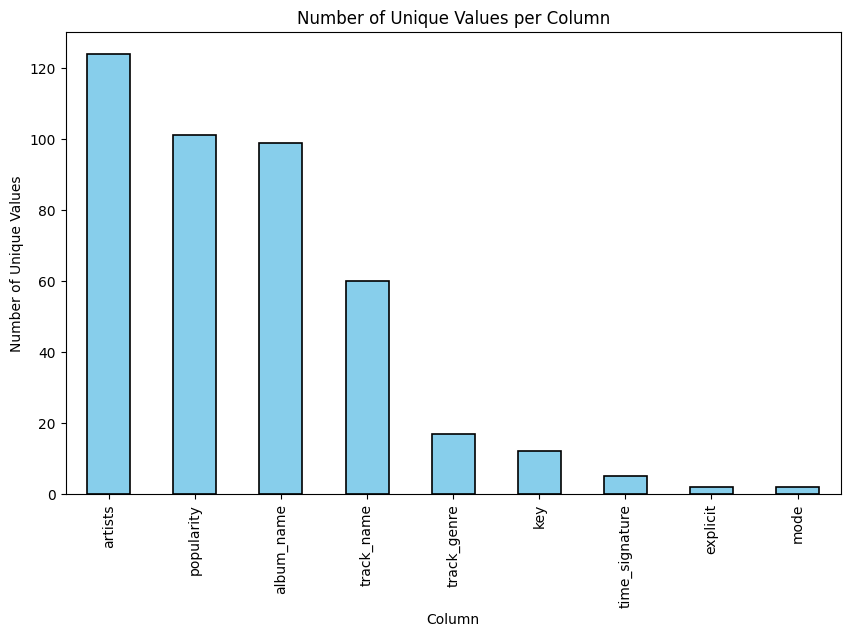

In [33]:
# plot the nunique of the columns to determine what columns are categorical
# to make job easier exclude any column with more than 500 unique values
nunique = df.nunique()
nunique = nunique[nunique < 500]
nunique = nunique.sort_values(ascending=False)
# plot
plt.figure(figsize=(10, 6))
nunique.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Number of Unique Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.show()

In [34]:
categorical_columns = nunique.index.tolist()
continuse_columns = [col for col in df.columns if col not in categorical_columns]

In [35]:
continuse_columns.remove('track_id')
continuse_columns

['duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [36]:
# scale non categorical columns exculde track_id
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.drop(columns='track_id', inplace=True)
df[continuse_columns] = scaler.fit_transform(df[continuse_columns])

# Train Model

In [37]:
# save df to csv
df.to_csv('cleaned_dataset.csv', index=False)